<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

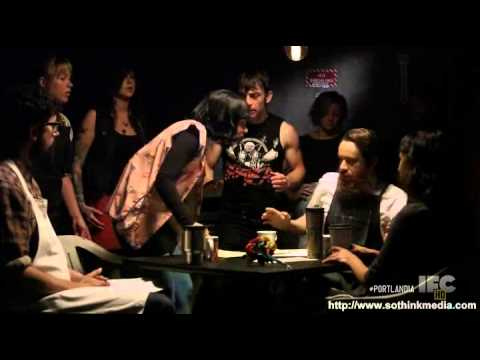

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/maximevacher-materno/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [5]:
def clean_df(df):
    df.star_rating = df.star_rating.apply(lambda x: x.replace(' star rating', '')).astype('float')
    df.full_review_text = df.full_review_text.map(lambda x: x[11:].strip())
    return df

df = clean_df(shops)

In [6]:
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0


In [7]:
def get_lemmas(text):
    
    #lemmas array
    lemmas = []
    
    #add stop_word
    stop_w = nlp.Defaults.stop_words.union([ 'coffee','Coffee','it','the','place','barista', 'Barista', 'come', ' ',''])
    
    #review text to the NLP pipeline 
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.text not in stop_w) and (token.is_punct == False))and (token.pos!= 'PRON'):
            lemmas.append(token.lemma_)
            
            
    return lemmas 

In [8]:
df['lemmas'] = df['full_review_text'].apply(get_lemmas)

In [9]:
df.head()

,coffee_shop_name,full_review_text,star_rating,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,"[1, check, love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,"[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,"[1, check, locate, Northcross, mall, shopping,..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [11]:
wc = count(df['lemmas'])

In [12]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
153,good,3572,5363,1.0,0.015556,0.015556,0.469013
98,great,2815,3881,2.0,0.011257,0.026813,0.369617
15,check,3175,3468,3.0,0.010059,0.036872,0.416886
152,like,2272,3378,4.0,0.009798,0.046670,0.298319
505,time,1762,2381,5.0,0.006906,0.053577,0.231355


In [13]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17115,Strata,1,1,17118.0,0.000003,0.999988,0.000131
17117,windowed,1,1,17119.0,0.000003,0.999991,0.000131
17118,actuality,1,1,17120.0,0.000003,0.999994,0.000131
17119,crass,1,1,17121.0,0.000003,0.999997,0.000131
17121,digestion,1,1,17122.0,0.000003,1.000000,0.000131


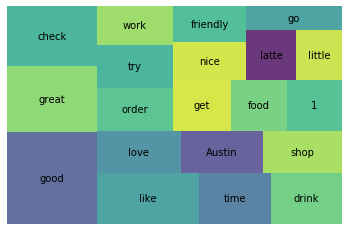

In [14]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [15]:
shops['coffee_shop_name'].nunique()

79

In [16]:
rating = df[['star_rating', 'lemmas']].copy()
good_review = rating[rating.star_rating > 3]
bad_review = rating[rating.star_rating < 3]
good_wc = count(good_review['lemmas'])
bad_wc = count(bad_review['lemmas'])

In [17]:
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
188,good,2929,4370,1.0,0.016237,0.016237,0.477036
98,great,2470,3418,2.0,0.012700,0.028937,0.402280
15,check,2686,2941,3.0,0.010928,0.039865,0.437459
185,like,1677,2434,4.0,0.009044,0.048909,0.273127
23,love,1584,2077,5.0,0.007717,0.056626,0.257980


In [18]:
bad_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15,like,294,480,1.0,0.012508,0.012508,0.398374
96,order,249,463,2.0,0.012065,0.024574,0.337398
16,good,286,403,3.0,0.010502,0.035076,0.387534
25,drink,187,352,4.0,0.009173,0.044249,0.253388
256,time,225,332,5.0,0.008652,0.052900,0.304878


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


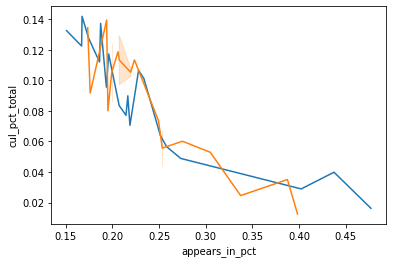

In [19]:
w_good = good_wc.iloc[:20]
w_bad = bad_wc.iloc[:20]
sns.lineplot(x='appears_in_pct',y='cul_pct_total', data= w_good)
sns.lineplot(x='appears_in_pct',y='cul_pct_total', data= w_bad)

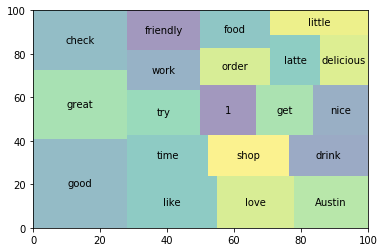

In [20]:
squarify.plot(sizes=w_good['pct_total'], label=w_good['word'],alpha=.5);

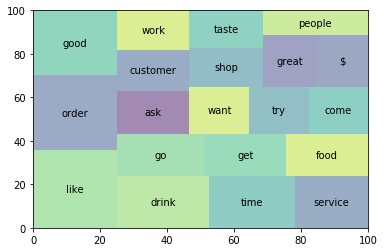

In [21]:
squarify.plot(sizes=w_bad['pct_total'], label=w_bad['word'],alpha=.5);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

